# 1. 감성 사전 기반

In [2]:
from nltk.corpus import movie_reviews

In [4]:
print('#review count: ', len(movie_reviews.fileids()))
print('#samples of file ids:', movie_reviews.fileids()[:10])
print('#categories of reviews:', movie_reviews.categories())
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) 
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) 

fileid = movie_reviews.fileids()[0]
print('#id of the first review:', fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) 
print('#sentiment of the first review:', movie_reviews.categories(fileid))

fileids = movie_reviews.fileids() 
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

#review count:  2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


In [10]:
!pip install -U textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.0 MB/s eta 0:00:0000:0100:01


In [11]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/mkw/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/mkw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mkw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mkw/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/mkw/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mkw/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


- Sentiment
    - polarity : 감성을 나타내는 극성, -1.0 ~ 1.0
    - subjectivity : 주관을 나타내는 극성, 0.0 (객관적) ~ 1.0 (주관적)

In [13]:
from textblob import TextBlob

result = TextBlob(reviews[0])
print(result.sentiment)

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [35]:
def sentiment_textBlob(docs):
    results = []
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

In [36]:
from sklearn.metrics import accuracy_score

print('#TextBlob accuracy : ', accuracy_score(categories, sentiment_textBlob(reviews)))

#TextBlob accuracy :  0.6


# 2. 머신러닝 기반

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(reviews, categories, test_size = 0.2, random_state = 7)

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

NB_clf = MultinomialNB(alpha = 0.01)
NB_clf.fit(X_train_tfidf, y_train)

print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.998
#Test set score: 0.797


In [41]:
import pandas as pd

In [44]:
df = pd.read_csv('./daum_movie_review.csv')

In [45]:
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


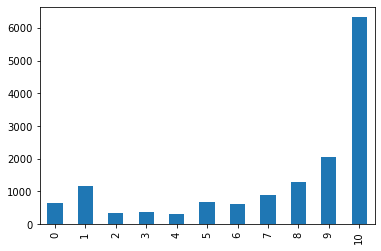

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

df['rating'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

In [57]:
X_train ,X_test, y_train, y_test = train_test_split(df['review'], df['rating'], random_state = 7)
print('#Train set size: ', len(X_train))
print('#Test set size: ', len(X_test))

from konlpy.tag import Okt
okt = Okt()

def twit_tokenizer(text):
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm = True, stem = True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer = twit_tokenizer, max_features = 2000, min_df = 5, max_df = 0.5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train set size:  11043
#Test set size:  3682


## 1) 다중회귀분석

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)

print('#Regression Train set R2 score: {:3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score: {:3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score: 0.604548
#Regression Test set R2 score: 0.395006


In [66]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import precision_score, recall_score, f1_score

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))
print('-'*30)
print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.888
#Precision for train set: 0.893
#Recall for train set: 0.969
#F1 for train set: 0.929
------------------------------
#Accuracy for test set: 0.848
#Precision for test set: 0.868
#Recall for test set: 0.946
#F1 for test set: 0.905


## 2) 로지스틱 회귀분석

In [67]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train_senti)

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))
print('-'*30)
print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.878
#Precision for train set: 0.878
#Recall for train set: 0.973
#F1 for train set: 0.923
------------------------------
#Accuracy for test set: 0.855
#Precision for test set: 0.866
#Recall for test set: 0.958
#F1 for test set: 0.910
